# Introduction

Using a data set consisting of health and demographic data obtained from Global Health Observatory Data Repository to structure and present analysis. We will be answering the questions and performing any additional analysis that will help us understand what's going on in the data. We are going present the work using this notebook.

# Data processing

Importing modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Below we use pandas pd.read_csv method to read in the data csv file and we also check if there are missing values by using isnull()

In [2]:
df = pd.read_csv('../Datasets/data.csv')
df

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),Americas,29955,28.84,9.17,2.44,75,15.3,97.78,NaN,12430.0,94.7,95.1
190,Viet Nam,Western Pacific,90796,22.87,9.32,1.79,75,23.0,143.39,93.2,3250.0,NaN,NaN
191,Yemen,Eastern Mediterranean,23852,40.72,4.54,4.35,64,60.0,47.05,63.9,2170.0,85.5,70.5
192,Zambia,Africa,14075,46.73,3.95,5.77,55,88.5,60.59,71.2,1490.0,91.4,93.9


## Missing values in the data set

We are going to be checking for missing values in the data set.

In [3]:
df.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

By using isnull() method, it returns a dataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False. We would like to know how many values are missing in each column and therefore we made use of df.isnull().sum to sum up every missing value in each column from above we notice that:
- For Fertility rate there is 11 missing values
- In CellularSubscribers there is 10 missing values
- For Literacy rate there is 91 missing values
- GNI is missing 32 values 
- PrimarySchoolEnrollmentMale is missing 93 values
- PrimarySchoolEnrollmentFemale is missing 93 values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

We use the info() function to print the full summary of the data frame and the different Data types we have in the data set.

## Fixing other problems with the dataset.

Below we use drop() to drop the columns that we will not be using.

In [5]:
df = df.drop(['CellularSubscribers', 'PrimarySchoolEnrollmentMale', 'PrimarySchoolEnrollmentFemale'], axis=1)
df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,LiteracyRate,GNI
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,NaN,1140.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,NaN,8820.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,NaN,8310.0
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,NaN,NaN
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,70.1,5230.0


We are going to use the skew() method which calculates the skewness for each column. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

In [6]:
print(df.skew())

Population        8.516265
Under15           0.208951
Over60            0.860879
FertilityRate     0.994529
LifeExpectancy   -0.672055
ChildMortality    1.459737
LiteracyRate     -1.148555
GNI               1.874357
dtype: float64


From the above output, the skewness value of 0 denotes a symmetrical distribution of values, a negative skewness value in the output indicates an asymmetry in the distribution that being for life expectancy and literacy rate, and a positive skewness value in the output indicates an asymmetry in the distribution.

**Other problems in the data set**

We have missing values in the data set.

In [7]:
LiteracyRate = df['LiteracyRate'].median()
df['LiteracyRate'].fillna(LiteracyRate, inplace=True)

FertilityRate = df['FertilityRate'].median()
df['FertilityRate'].fillna(FertilityRate, inplace=True)

GNI = df['GNI'].median()
df['GNI'].fillna(GNI, inplace=True) 

df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,LiteracyRate,GNI
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,91.8,1140.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,91.8,8820.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,91.8,8310.0
3,Andorra,Europe,78,15.20,22.86,2.40,82,3.2,91.8,7870.0
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,70.1,5230.0


To deal with the missing values, we replaced these values using the median() as it ignores the influence of outliers and updates the middle value that occurred in that column.

# Exploratory data analysis

**The country with the lowest % of their population under 15**

In [8]:
low_percent = df['Under15'].min()
df.loc[df['Under15'] == low_percent,['Country','Under15']]

,Country,Under15
85,Japan,13.12


Japan has the lowest % of their population under 15.

**The country with the highest % of their population under 15.**

In [9]:
high_percent = df['Under15'].max()
df.loc[df['Under15'] == high_percent,['Country','Under15']]

,Country,Under15
123,Niger,49.99


Niger has the highest % of their population under 15.

**The region with the highest percentage of their population over 60.**

In [10]:
data = df['Over60'].max()

df.loc[df['Over60']==data,['Country','Over60']] 

,Country,Over60
85,Japan,31.92


Japan has the highest % of their population over 60.

#### Fertility rate against income(GNI) 

In [11]:
print(df.corr())

                Population   Under15    Over60  FertilityRate  LifeExpectancy  \
Population        1.000000 -0.059634  0.011693      -0.069092        0.016277   
Under15          -0.059634  1.000000 -0.829390       0.926937       -0.836467   
Over60            0.011693 -0.829390  1.000000      -0.683791        0.688129   
FertilityRate    -0.069092  0.926937 -0.683791       1.000000       -0.827571   
LifeExpectancy    0.016277 -0.836467  0.688129      -0.827571        1.000000   
ChildMortality   -0.003675  0.815076 -0.624303       0.862240       -0.924564   
LiteracyRate      0.031954 -0.616491  0.438608      -0.659896        0.594304   
GNI              -0.019396 -0.624864  0.575787      -0.496208        0.595299   

                ChildMortality  LiteracyRate       GNI  
Population           -0.003675      0.031954 -0.019396  
Under15               0.815076     -0.616491 -0.624864  
Over60               -0.624303      0.438608  0.575787  
FertilityRate         0.862240     -0.6598

Above we used the corr() method which calculates the relationship between each column in your data set.

Use a scatter plot to find the relationship between two variables in this case fertility and income.

The Correlation efficient for fertility rate and the GNI is:  -0.49620832062306547
Fertility decreases as income increases - the two have a negative correlation.


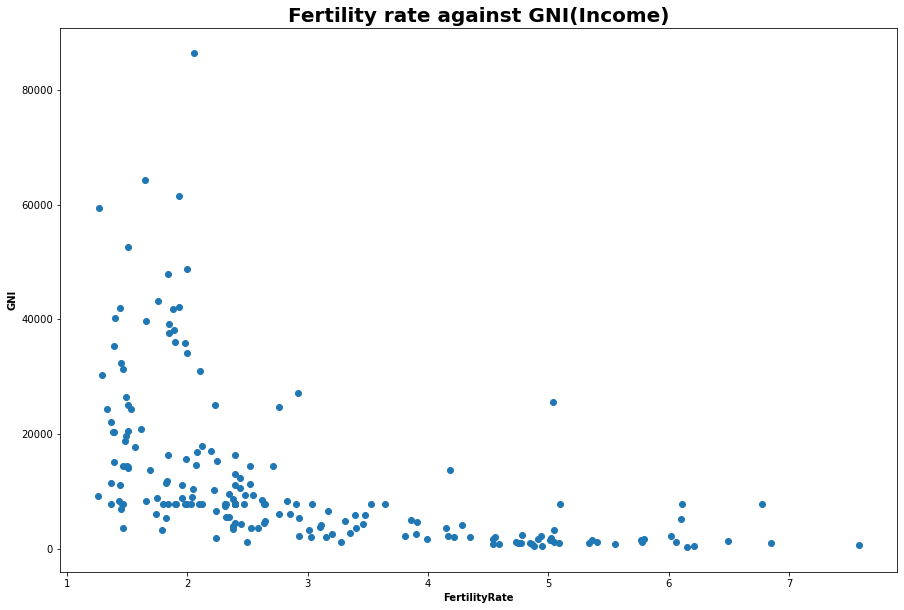

In [12]:
corr = df.FertilityRate.corr(df.GNI)
print("The Correlation efficient for fertility rate and the GNI is: ", corr)
print('Fertility decreases as income increases - the two have a negative correlation.')

plt.figure(figsize=(15, 10))
plt.scatter(df.FertilityRate, df.GNI)
plt.title("Fertility rate against GNI(Income)", fontsize=20, fontweight='bold')
plt.xlabel("FertilityRate", fontweight='bold')
plt.ylabel("GNI", fontweight='bold')

plt.show()

The data shows a downhill pattern as you move from left to right, this indicates a negative relationship between FertilityRate and GNI(income). As Fertility rate values increase the GNI values tend to decrease and as Fertility decreases the income increases.

**Regions with lowest literacy rates**

We are then going to find out which region has the lowest literacy rate.

In [13]:
literacy_rates = df[["Region", "LiteracyRate"]]
literacy_rates.groupby('Region').min()

,LiteracyRate
Region,
Africa,31.1
Americas,75.2
Eastern Mediterranean,63.9
Europe,91.8
South-East Asia,56.8
Western Pacific,60.6


South-East Asia and Africa are the regions which have the lowest literacy rates.

**Regions with the lowest child mortality rate**

We will figure out which regions have the lowest child mortality rate.

In [14]:
child_mortality_rate = df[['Region', 'ChildMortality']]
child_mortality_rate.groupby('Region').min()

,ChildMortality
Region,
Africa,13.1
Americas,5.3
Eastern Mediterranean,7.4
Europe,2.2
South-East Asia,9.6
Western Pacific,2.9


South-East Asia and Europe have the lowest child mortality rates.

**How the life expectancy across the different regions is shown using box-and-whisker plot.**

[]

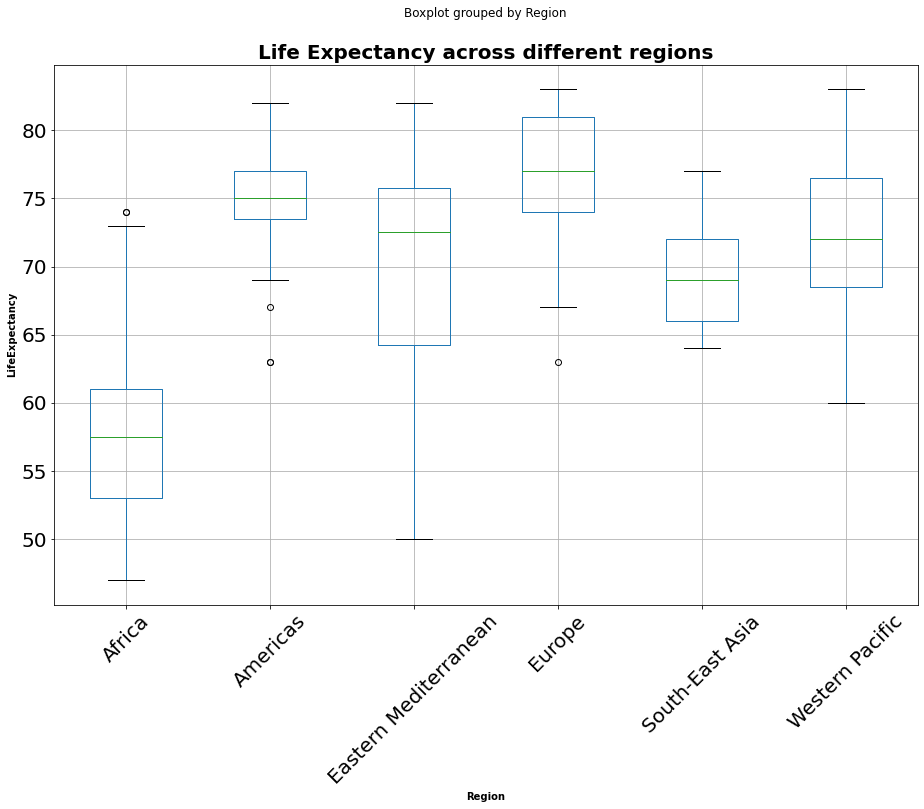

In [15]:
boxplot = df.boxplot(column=['LifeExpectancy'], by='Region', grid=True, rot=45, fontsize=20, figsize=(15, 10))
plt.title("Life Expectancy across different regions", fontsize=20, fontweight='bold')
plt.xlabel("Region", fontweight='bold')
plt.ylabel("LifeExpectancy", fontweight='bold')
boxplot.plot()

From the graph above, we can conclude that people in Africa have the least life expectancy with the median being around 57, and the lower quartile being below 53 making it the Region with the lowest life expectancy. While people from Europe have the most life expectancy with the median being 77 and the upper quartile being over 82. 

**How life expectancy is related to wealth across different regions**

0.5952986751901821
There is a positive relationship between Life Expectancy and Wealth across all regions.


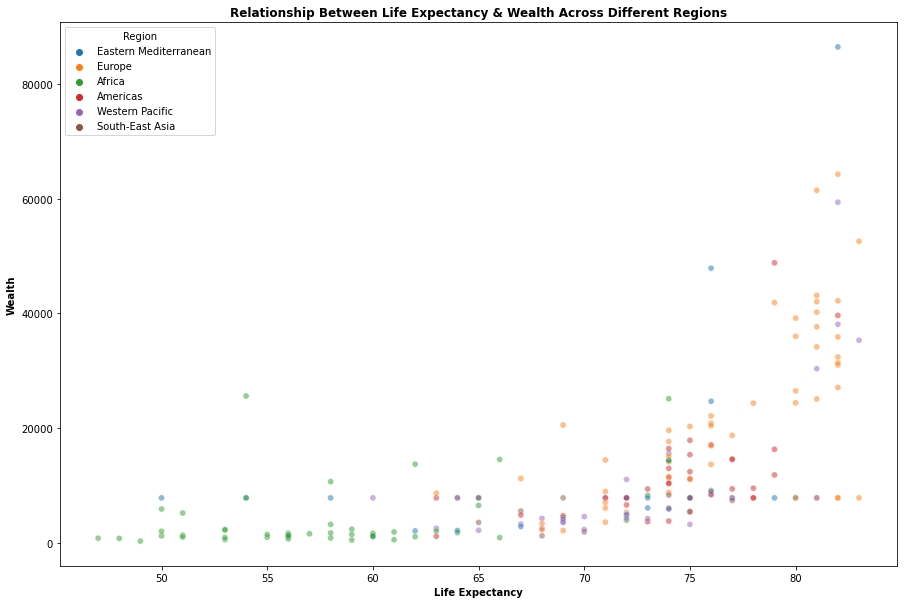

In [16]:
GNI_corr = (df.LifeExpectancy.corr(df.GNI))
print(GNI_corr)
print("There is a positive relationship between Life Expectancy and Wealth across all regions.")

plt.figure(figsize=(15, 10))
sns.scatterplot(df.LifeExpectancy, df.GNI, hue='Region', alpha=0.5, data=df)
plt.title('Relationship Between Life Expectancy & Wealth Across Different Regions', fontweight='bold')
plt.xlabel('Life Expectancy', fontweight='bold')
plt.ylabel('Wealth', fontweight='bold')
plt.show()

There is a positive relationship between Life expectancy and wealth across all regions, when one increases the other also increases. Life expectancy increases with wealth which could mean that the healthcare systems in wealthy regions such as Europe are more accessible to people and more advanced compared to Africa which has a lower life expectancy than any other region.

**The relationship between Fertility and wealth**

-0.49620832062306547
There is a negative relationship between Fertility and Wealth across all regions.


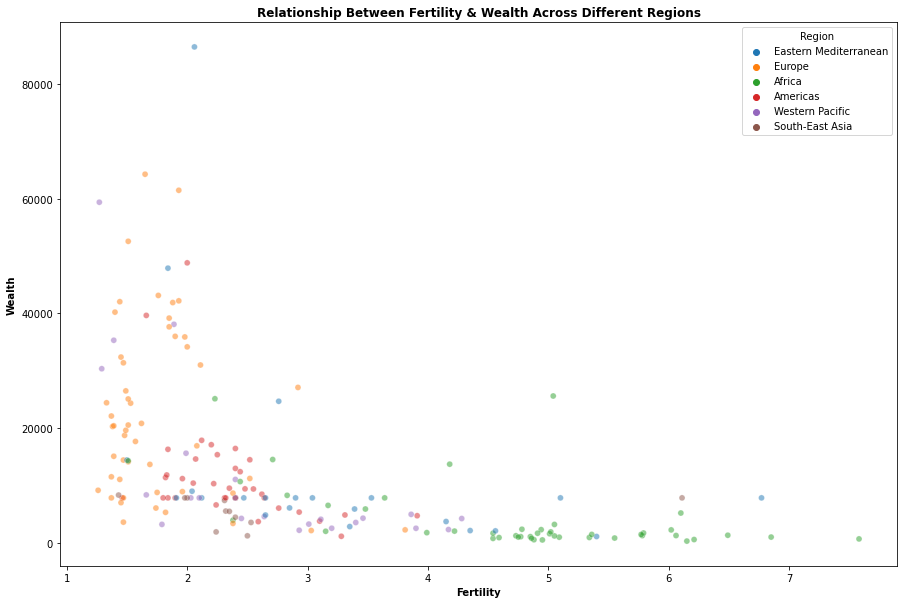

In [17]:
wealth_fertility_corr = (df.FertilityRate.corr(df.GNI))
print(wealth_fertility_corr)
print("There is a negative relationship between Fertility and Wealth across all regions.")

plt.figure(figsize=(15, 10))
sns.scatterplot(df.FertilityRate, df.GNI, hue='Region', alpha=0.5, data=df)
plt.title('Relationship Between Fertility & Wealth Across Different Regions', fontweight='bold')
plt.ylabel('Wealth', fontweight='bold')
plt.xlabel('Fertility', fontweight='bold')
plt.show()

There is a negative relationship between Fertility and Wealth across all regions. When one increases, the other decreases.

**Representing the relationship between literacy and life expectancy by region using the scatter plot.**

0.5943044561294527
There is a positive relationship between Life Expectancy and Literacy across all regions.


Text(0, 0.5, 'LiteracyRate')

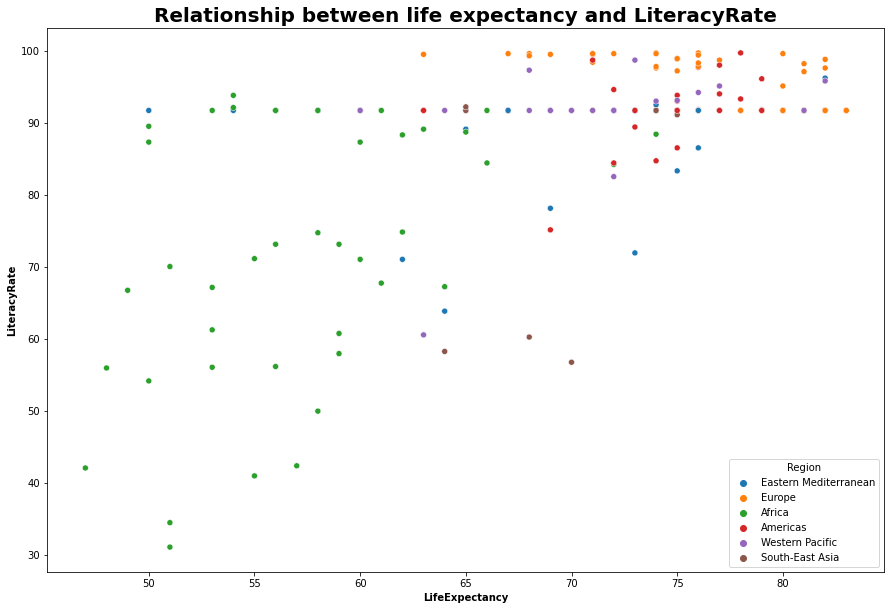

In [18]:
literacy_expectancy_corr = (df.LiteracyRate.corr(df.LifeExpectancy))
print(literacy_expectancy_corr)
print("There is a positive relationship between Life Expectancy and Literacy across all regions.")

plt.figure(figsize=(15, 10))
sns.scatterplot(x='LifeExpectancy', y='LiteracyRate', hue='Region', data=df)
plt.title('Relationship between life expectancy and LiteracyRate', fontsize=20, fontweight='bold')
plt.xlabel("LifeExpectancy", fontweight='bold')
plt.ylabel("LiteracyRate", fontweight='bold')

We can conclude that the higher the life expectancy, the more or higher the literacy rate, and vice versa. It is accurate because the graph shows all the possible or rather the relationship between life expectancy and literacy rate. In Africa, there is neither a positive nor negative correlation between life expectancy and literacy, we can say that there is a correlation of zero.

# Conclusion and insights

From looking and after investigating the given data set, we can conclude that the Region Africa is less fortunate as it is shown in graphs that it is at the bottom when it comes to literacy rates and many other things. The scatter plot was mostly used in this investigation as we had to compare mostly two variables.

1. We had missing values in our data set and we solved the missing values by using the mean(). We also dropped the columns which we did not use.

2. Japan had the lowest percentage of their population under 15 while Niger had the highest percentage.

3. Europe have highest population over 60.

4. Fertility rate decrease when income increases in developed countries and some countries don't seem to follow the relation because they are still developing.

5. Africa has the lowest literacy rate and Europe has the lowest child mortality rate across all the other regions.

6. There is a strong correlation between life expectancy and wealth across different regions and there is a negative coorrelation between wealth and fertility across different regions.